In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [3]:
churn =pd.read_csv("/content/ml project.csv")
churn.head()

,Customer ID,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,...,Age,Married,Number of Dependents,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,0,1,NaN,No,0.00,No,DSL,8,No,...,78,No,0,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,8,Offer E,Yes,48.85,Yes,Fiber Optic,17,No,...,74,Yes,1,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,0,18,Offer D,Yes,11.33,Yes,Fiber Optic,52,No,...,71,No,3,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,25,Offer C,Yes,19.76,No,Fiber Optic,12,No,...,78,Yes,1,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,37,Offer C,Yes,6.33,Yes,Fiber Optic,14,No,...,80,Yes,1,2,Churned,Yes,67,2793,Price,Extra data charges


In [4]:
#checking duplicates
churn.duplicated().sum()

0

In [8]:
#Checking missing values
churn.isnull().sum()

,0
Customer ID,0
Number of Referrals,0
Tenure in Months,0
Offer,3877
Phone Service,0
Avg Monthly Long Distance Charges,0
Multiple Lines,0
Internet Type,1526
Avg Monthly GB Download,0
Online Security,0


In [10]:
churn.drop(['Customer ID', 'Latitude', 'Longitude', 'Avg Monthly GB Download',
         'City', 'Zip Code', 'CLTV', 'Total Long Distance Charges',
         'Avg Monthly Long Distance Charges', 'Number of Referrals', 'Total Refunds',
         'Total Extra Data Charges', 'Total Revenue', 'Population', 'Number of Dependents',],
        axis=1, inplace=True, errors='ignore')

In [11]:
df=pd.DataFrame(churn)

In [12]:
# Replace
df['Offer']=df['Offer'].fillna('No Offer')

In [13]:
df['Internet Type']=df['Internet Type'].fillna('No Internet Service')
df.isnull().sum()

,0
Tenure in Months,0
Offer,0
Phone Service,0
Multiple Lines,0
Internet Type,0
Online Security,0
Online Backup,0
Device Protection Plan,0
Premium Tech Support,0
Streaming TV,0


In [14]:
fig=px.imshow(df.isnull())
fig.update_layout(title="Null values in each columms")
fig.show()

In [15]:
##Remove missing values column
df.drop(['Churn Category','Churn Reason'],axis=1,inplace=True)

In [16]:
df.duplicated().sum()
#No duplicates so no need to drop any column

0

In [17]:
df.isna().sum()

,0
Tenure in Months,0
Offer,0
Phone Service,0
Multiple Lines,0
Internet Type,0
Online Security,0
Online Backup,0
Device Protection Plan,0
Premium Tech Support,0
Streaming TV,0


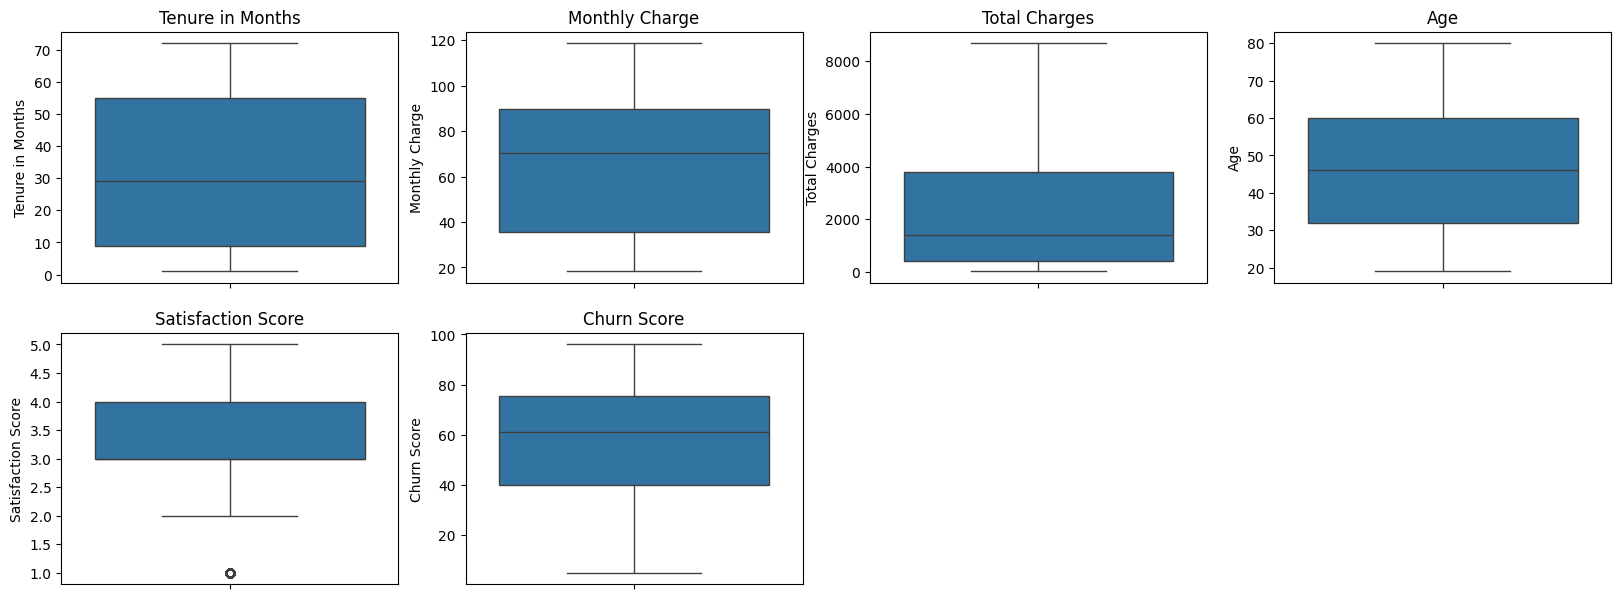

In [18]:
##Outliers Detection
num_features = df.select_dtypes("number").columns
plt.figure(figsize=(20,15))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df[col])
    plt.title(col)

The value of q1 is: 400.15
The value of q3 is: 3786.6
The value of iqr is: 3386.45
The value of upper bound is: -4680
The value of lower bound is: 8866


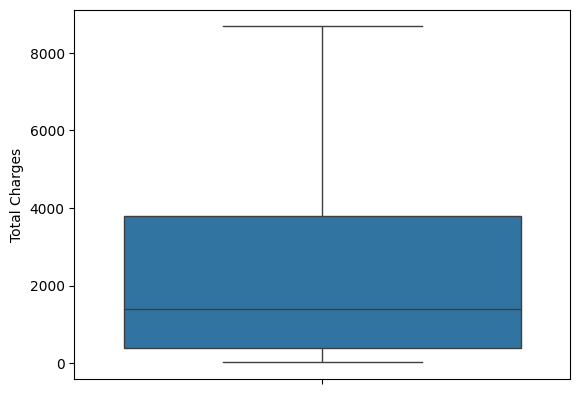

In [19]:
###Outliers Removing
sorts=df['Total Charges'].sort_values()
sorts
q1=sorts.quantile(0.25)
q3=sorts.quantile(0.75)

print("The value of q1 is:",q1)
print("The value of q3 is:",q3)
iqr = q3 - q1
print("The value of iqr is:",iqr)
upper=q1-1.5*iqr
lower=q3+1.5*iqr

print("The value of upper bound is:",round(upper))
print("The value of lower bound is:",round(lower))
clean_data=sorts[~((sorts<(upper))  |  (sorts>(lower)))]
clean_data
sns.boxplot(y=clean_data)
plt.show()

In [20]:
df1=pd.DataFrame(df)
df1

,Tenure in Months,Offer,Phone Service,Multiple Lines,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,...,Payment Method,Monthly Charge,Total Charges,Gender,Age,Married,Satisfaction Score,Customer Status,Churn Label,Churn Score
0,1,No Offer,No,No,DSL,No,No,Yes,No,No,...,Bank Withdrawal,39.65,39.65,Male,78,No,3,Churned,Yes,91
1,8,Offer E,Yes,Yes,Fiber Optic,No,Yes,No,No,No,...,Credit Card,80.65,633.30,Female,74,Yes,3,Churned,Yes,69
2,18,Offer D,Yes,Yes,Fiber Optic,No,No,No,No,Yes,...,Bank Withdrawal,95.45,1752.55,Male,71,No,2,Churned,Yes,81
3,25,Offer C,Yes,No,Fiber Optic,No,Yes,Yes,No,Yes,...,Bank Withdrawal,98.50,2514.50,Female,78,Yes,2,Churned,Yes,88
4,37,Offer C,Yes,Yes,Fiber Optic,No,No,No,No,No,...,Bank Withdrawal,76.50,2868.15,Female,80,Yes,2,Churned,Yes,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,No Offer,Yes,No,No Internet Service,No,No,No,No,No,...,Bank Withdrawal,21.15,1419.40,Female,30,No,5,Stayed,No,45
7039,24,Offer C,Yes,Yes,Cable,Yes,No,Yes,Yes,Yes,...,Mailed Check,84.80,1990.50,Male,38,Yes,3,Stayed,No,59
7040,72,No Offer,Yes,Yes,Fiber Optic,No,Yes,Yes,No,Yes,...,Credit Card,103.20,7362.90,Female,30,Yes,4,Stayed,No,71
7041,11,No Offer,No,No,DSL,Yes,No,No,No,No,...,Bank Withdrawal,29.60,346.45,Female,32,Yes,4,Stayed,No,59


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tenure in Months        7043 non-null   int64  
 1   Offer                   7043 non-null   object 
 2   Phone Service           7043 non-null   object 
 3   Multiple Lines          7043 non-null   object 
 4   Internet Type           7043 non-null   object 
 5   Online Security         7043 non-null   object 
 6   Online Backup           7043 non-null   object 
 7   Device Protection Plan  7043 non-null   object 
 8   Premium Tech Support    7043 non-null   object 
 9   Streaming TV            7043 non-null   object 
 10  Streaming Movies        7043 non-null   object 
 11  Streaming Music         7043 non-null   object 
 12  Unlimited Data          7043 non-null   object 
 13  Contract                7043 non-null   object 
 14  Paperless Billing       7043 non-null   

In [22]:
df1.describe()##it gives the no. of non null entries and etc. for each column

,Tenure in Months,Monthly Charge,Total Charges,Age,Satisfaction Score,Churn Score
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.386767,64.761692,2280.381264,46.509726,3.244924,58.505040
std,24.542061,30.090047,2266.220462,16.750352,1.201657,21.170031
min,1.000000,18.250000,18.800000,19.000000,1.000000,5.000000
25%,9.000000,35.500000,400.150000,32.000000,3.000000,40.000000
50%,29.000000,70.350000,1394.550000,46.000000,3.000000,61.000000
75%,55.000000,89.850000,3786.600000,60.000000,4.000000,75.500000
max,72.000000,118.750000,8684.800000,80.000000,5.000000,96.000000


EDA

In [23]:
num_cols = df1.select_dtypes(include='number').columns.tolist()
cat_cols = df1.select_dtypes(include='object').columns.tolist()

print('Numerical columns:', num_cols)
print('Categorical columns:', cat_cols)

Numerical columns: ['Tenure in Months', 'Monthly Charge', 'Total Charges', 'Age', 'Satisfaction Score', 'Churn Score']
Categorical columns: ['Offer', 'Phone Service', 'Multiple Lines', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Gender', 'Married', 'Customer Status', 'Churn Label']


In [24]:
import plotly.express as px

def univ_num(df1, col):
    fig = px.histogram(df1, x=col, marginal='box')
    fig.show()

In [25]:
for col in ['Tenure in Months', 'Monthly Charge','Total Charges','Age', 'Satisfaction Score', 'Churn Score']:
    univ_num(df1, col)

Interpretation

***chart1***: TENURE DISTRIBUTION

1.Most customers have a tenure between 50 and 70 months.

2.There are fewer customers with very short or very long tenures.

3.There are a few outliers with very long tenures.

   This information can be useful for understanding customer loyalty and identifying patterns in customer behavior.

***chart2***:MONTHLY CHARGE DISTRIBUTION

1.Most of the customers pay between dollar20 and dollar100 each month (the most common price range).

2.There are fewer customers who pay much lesser or much more which means that the extreme prices are not popular

3.A few customers pay a lot in more than everyone else .and those customers are considered as outliers.

this information can be usefull for the pricing startegies and customer segemnetation and revenue generation

***Chart3***:TOTAL CHARGES DISTRIBUTION

1.Most customers have a total charge between dollar 0 and dollar 2000.

2.There are fewer customers with very high total charges.

3.There are a fewer outliers with very total charges.

this information can be for the understanding the customer spending pattern and for the identification ofhigh value customers

***Chart4***:AGE DISTRIBUTION

1.This chart shows that there are about the same number of customers ineach age group

2.there are slightly more customers in the age range 30 and 40 years

3.a few customers are much older than every one else ,hence they can be considered as outliers

This information can be usefull for the understanding the customer base and targeting the marketing efforts and *developing* products or services tailored to specific age groups .

***Chart5***:Satistifaction Score Distribution

1.Most customers gave a satisfaction score of 3 or 4 on a scale of range from 1 to 5.

2.There are fewer customers with very low or very high satisfaction scores.

3.There is one outlier with a very low satisfaction score.

This information can be useful for understanding customer sentiment, identifying areas for improvement, and tracking changes in customer satisfaction over time.

**Chart6**: Churn Score Distribution

1.Most customers have a churn score between 60 and 80.

2.There are fewer customers with very low or very high churn scores.

3.There are a few outliers with very low churn scores.

 This information can be useful for identifying customers at risk of churning, implementing targeted retention strategies, and measuring the effectiveness of churn prevention efforts.

In [26]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
def univ_cat(df1, col):
    # Subplot with 1 row and 2 columns
    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'histogram'}, {'type':'pie'}]], subplot_titles=['Histogram', 'Pie'])
    fig.add_trace(go.Histogram(x=df[col]), 1, 1)
    fig.add_trace(go.Pie(labels=df[col].value_counts().index, values=df[col].value_counts(), textinfo='label+percent'), 1, 2)
    fig.update_layout( title_text=f'{col}')
    fig.update_traces(showlegend=False)
    fig.show()

In [27]:
for col in cat_cols:
    univ_cat(df1, col)

In [28]:
##Encoding
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()
# Apply label encoding to binary columns
binary_columns = ['Churn Label']  # Replace with actual binary columns in your dataset

for col in binary_columns:
    df1[col] = le.fit_transform(df1[col])

In [29]:
df1.corr(numeric_only=True)['Churn Label']# calculates the correlation between all numeric columns in df
df1.corr(numeric_only=True)['Churn Label'].abs().sort_values(ascending=False)#selecting only churn label column for the corelation matrix

,Churn Label
Churn Label,1.000000
Satisfaction Score,0.754649
Churn Score,0.660772
Tenure in Months,0.352861
Total Charges,0.198546
Monthly Charge,0.193356
Age,0.115760


In [30]:
def num_vs_target(df1, col):
    fig = px.histogram(df1, x=col, color='Churn Label', marginal='box')
    fig.show()

for col in ['Tenure in Months', 'Monthly Charge','Total Charges','Age', 'Satisfaction Score', 'Churn Score']:
    num_vs_target(df1, col)


In [31]:
df1

,Tenure in Months,Offer,Phone Service,Multiple Lines,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,...,Payment Method,Monthly Charge,Total Charges,Gender,Age,Married,Satisfaction Score,Customer Status,Churn Label,Churn Score
0,1,No Offer,No,No,DSL,No,No,Yes,No,No,...,Bank Withdrawal,39.65,39.65,Male,78,No,3,Churned,1,91
1,8,Offer E,Yes,Yes,Fiber Optic,No,Yes,No,No,No,...,Credit Card,80.65,633.30,Female,74,Yes,3,Churned,1,69
2,18,Offer D,Yes,Yes,Fiber Optic,No,No,No,No,Yes,...,Bank Withdrawal,95.45,1752.55,Male,71,No,2,Churned,1,81
3,25,Offer C,Yes,No,Fiber Optic,No,Yes,Yes,No,Yes,...,Bank Withdrawal,98.50,2514.50,Female,78,Yes,2,Churned,1,88
4,37,Offer C,Yes,Yes,Fiber Optic,No,No,No,No,No,...,Bank Withdrawal,76.50,2868.15,Female,80,Yes,2,Churned,1,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,No Offer,Yes,No,No Internet Service,No,No,No,No,No,...,Bank Withdrawal,21.15,1419.40,Female,30,No,5,Stayed,0,45
7039,24,Offer C,Yes,Yes,Cable,Yes,No,Yes,Yes,Yes,...,Mailed Check,84.80,1990.50,Male,38,Yes,3,Stayed,0,59
7040,72,No Offer,Yes,Yes,Fiber Optic,No,Yes,Yes,No,Yes,...,Credit Card,103.20,7362.90,Female,30,Yes,4,Stayed,0,71
7041,11,No Offer,No,No,DSL,Yes,No,No,No,No,...,Bank Withdrawal,29.60,346.45,Female,32,Yes,4,Stayed,0,59


In [32]:
global_mean=df1['Churn Label'].mean()
global_mean

0.2653698707936959

In [33]:
def cat_vs_target(df1, col):
    # Calculate the mean of 'Churn Label' for each group and reset the index,
    # using the 'name' parameter to avoid naming conflicts.
    df_group = df1.groupby(col)['Churn Label'].mean().reset_index(name='Average Churn Label')
    fig = px.bar(df_group, x=col, y='Average Churn Label', color='Average Churn Label', text='Average Churn Label', width=800, height=400)
    # Horizontal line for global mean
    fig.add_shape(type='line', x0=-0.5, x1=len(df_group[col]), y0=global_mean, y1=global_mean, line=dict(color='black', width=3))
    # Add text
    fig.add_annotation(x=0.7, y=global_mean+0.02, text=f'Global mean: {global_mean:.2f}', showarrow=False, font=dict(color='black', size=14))
    fig.update_layout( title_text=f'{col}',showlegend=False)
    fig.show()

for col in cat_cols:
    cat_vs_target(df1, col)

Text(0.5, 1.0, 'Correlation heatmap')

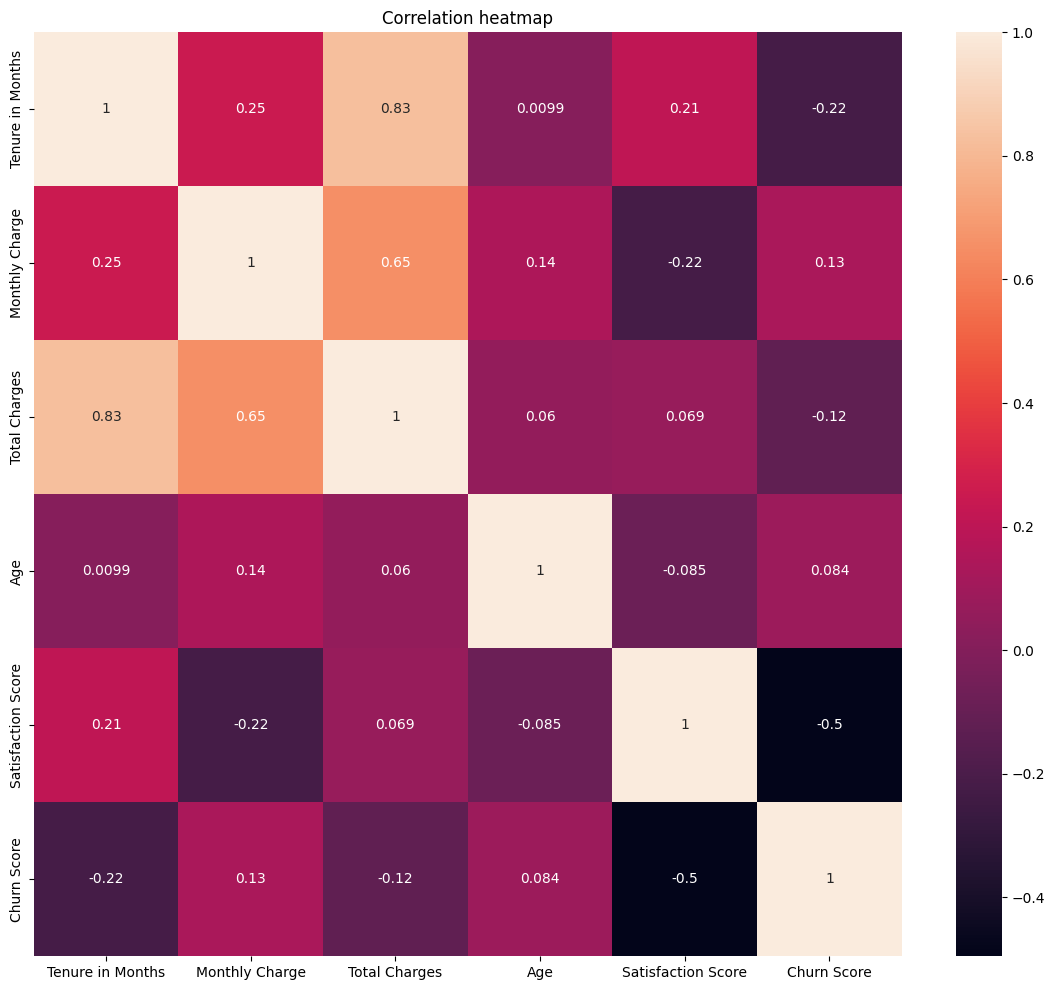

In [34]:
plt.figure(figsize=(14, 12))
sns.heatmap(df1[num_features].corr(), annot=True)
plt.title("Correlation heatmap")

In [35]:
# Create a new column 'Avg Monthly Charges' as total charges and tenure in months have some relation
df1['Avg_Monthly_Charges'] = df1['Total Charges'] / df1['Tenure in Months']

# Display the first few rows to verify
print(df1[['Tenure in Months', 'Total Charges', 'Avg_Monthly_Charges']].head())

   Tenure in Months  Total Charges  Avg_Monthly_Charges
0                 1          39.65            39.650000
1                 8         633.30            79.162500
2                18        1752.55            97.363889
3                25        2514.50           100.580000
4                37        2868.15            77.517568


In [36]:
# Create a new column 'Average Tenure Charges' by dividing 'Total Charges' by 'Monthly Charges'
df1['Avg_Tenure_Charges'] = df1['Total Charges'] / df1['Monthly Charge']

# Display the first few rows to verify the new column
print(df1[['Monthly Charge', 'Total Charges', 'Avg_Tenure_Charges']].head())

   Monthly Charge  Total Charges  Avg_Tenure_Charges
0           39.65          39.65            1.000000
1           80.65         633.30            7.852449
2           95.45        1752.55           18.360922
3           98.50        2514.50           25.527919
4           76.50        2868.15           37.492157


In [37]:
d=df1.drop(columns=['Total Charges','Monthly Charge','Tenure in Months'],axis=1)

In [38]:
df2=pd.DataFrame(d)
df2

,Offer,Phone Service,Multiple Lines,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,...,Payment Method,Gender,Age,Married,Satisfaction Score,Customer Status,Churn Label,Churn Score,Avg_Monthly_Charges,Avg_Tenure_Charges
0,No Offer,No,No,DSL,No,No,Yes,No,No,Yes,...,Bank Withdrawal,Male,78,No,3,Churned,1,91,39.650000,1.000000
1,Offer E,Yes,Yes,Fiber Optic,No,Yes,No,No,No,No,...,Credit Card,Female,74,Yes,3,Churned,1,69,79.162500,7.852449
2,Offer D,Yes,Yes,Fiber Optic,No,No,No,No,Yes,Yes,...,Bank Withdrawal,Male,71,No,2,Churned,1,81,97.363889,18.360922
3,Offer C,Yes,No,Fiber Optic,No,Yes,Yes,No,Yes,Yes,...,Bank Withdrawal,Female,78,Yes,2,Churned,1,88,100.580000,25.527919
4,Offer C,Yes,Yes,Fiber Optic,No,No,No,No,No,No,...,Bank Withdrawal,Female,80,Yes,2,Churned,1,67,77.517568,37.492157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No Offer,Yes,No,No Internet Service,No,No,No,No,No,No,...,Bank Withdrawal,Female,30,No,5,Stayed,0,45,19.713889,67.111111
7039,Offer C,Yes,Yes,Cable,Yes,No,Yes,Yes,Yes,Yes,...,Mailed Check,Male,38,Yes,3,Stayed,0,59,82.937500,23.472877
7040,No Offer,Yes,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,...,Credit Card,Female,30,Yes,4,Stayed,0,71,102.262500,71.345930
7041,No Offer,No,No,DSL,Yes,No,No,No,No,No,...,Bank Withdrawal,Female,32,Yes,4,Stayed,0,59,31.495455,11.704392


One Hot Encoding

In [39]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_columns = df2.select_dtypes(include=['object']).columns
df3 = df2[categorical_columns]
# Apply one-hot encoding
df_encoded = pd.get_dummies(df2, columns=categorical_columns, drop_first=True)
# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

   Age  Satisfaction Score  Churn Label  Churn Score  Avg_Monthly_Charges  \
0   78                   3            1           91            39.650000   
1   74                   3            1           69            79.162500   
2   71                   2            1           81            97.363889   
3   78                   2            1           88           100.580000   
4   80                   2            1           67            77.517568   

   Avg_Tenure_Charges  Offer_Offer A  Offer_Offer B  Offer_Offer C  \
0            1.000000          False          False          False   
1            7.852449          False          False          False   
2           18.360922          False          False          False   
3           25.527919          False          False           True   
4           37.492157          False          False           True   

   Offer_Offer D  ...  Unlimited Data_Yes  Contract_One Year  \
0          False  ...               False           

In [40]:
df_encoded.corr()

,Age,Satisfaction Score,Churn Label,Churn Score,Avg_Monthly_Charges,Avg_Tenure_Charges,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,...,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check,Gender_Male,Married_Yes,Customer Status_Joined,Customer Status_Stayed
Age,1.000000,-0.085170,0.115760,0.083919,0.142325,0.009594,-0.017994,-0.024634,0.025540,-0.024676,...,0.084353,-0.000922,0.027145,0.100723,-0.105903,-0.034242,0.002186,-0.003666,-0.057041,-0.078918
Satisfaction Score,-0.085170,1.000000,-0.754649,-0.495144,-0.224469,0.209746,0.070783,0.070655,0.014731,0.000235,...,-0.210489,0.147564,0.221553,-0.156436,0.165131,-0.039140,-0.003948,0.077743,0.159178,0.625565
Churn Label,0.115760,-0.754649,1.000000,0.660772,0.192531,-0.352589,-0.126654,-0.117723,-0.020660,0.001435,...,0.166545,-0.190418,-0.328195,0.191825,-0.218528,0.056348,-0.008612,-0.150448,-0.157765,-0.856718
Churn Score,0.083919,-0.495144,0.660772,1.000000,0.131557,-0.224686,-0.101666,-0.063276,-0.003634,-0.001248,...,0.105057,-0.129515,-0.218203,0.128606,-0.139536,0.029493,0.000638,-0.111704,-0.123491,-0.556043
Avg_Monthly_Charges,0.142325,-0.224469,0.192531,0.131557,1.000000,0.248905,0.121227,0.073688,0.012944,-0.066523,...,0.582084,0.015780,-0.045627,0.349686,-0.234349,-0.136543,-0.015294,0.096158,-0.185289,-0.084028
Avg_Tenure_Charges,0.009594,0.209746,-0.352589,-0.224686,0.248905,1.000000,0.431844,0.310750,-0.017775,-0.204033,...,0.031309,0.191375,0.529999,0.005261,0.056779,-0.129626,0.004517,0.380185,-0.327462,0.502166
Offer_Offer A,-0.017994,0.070783,-0.126654,-0.101666,0.121227,0.431844,1.000000,-0.102774,-0.070650,-0.086318,...,0.020459,-0.022856,0.329984,0.002261,0.040109,-0.046398,0.017948,0.171485,-0.074113,0.157655
Offer_Offer B,-0.024634,0.070655,-0.117723,-0.063276,0.073688,0.310750,-0.102774,1.000000,-0.091083,-0.111282,...,0.016824,0.144645,0.070565,0.014393,-0.008712,-0.017574,-0.009648,0.103412,-0.095548,0.160464
Offer_Offer C,0.025540,0.014731,-0.020660,-0.003634,0.012944,-0.017775,-0.070650,-0.091083,1.000000,-0.076499,...,0.010811,0.075196,-0.057156,0.006416,0.002495,-0.001819,0.022342,-0.004173,-0.065683,0.053710
Offer_Offer D,-0.024676,0.000235,0.001435,-0.001248,-0.066523,-0.204033,-0.086318,-0.111282,-0.076499,1.000000,...,-0.032038,-0.026337,-0.119276,-0.011901,0.016687,0.011376,0.005217,-0.062790,-0.080249,0.040569


In [41]:
num_features_updated = ['Age', 'Satisfaction Score', 'Churn Score', 'Avg_Monthly_Charges', 'Avg_Tenure_Charges']


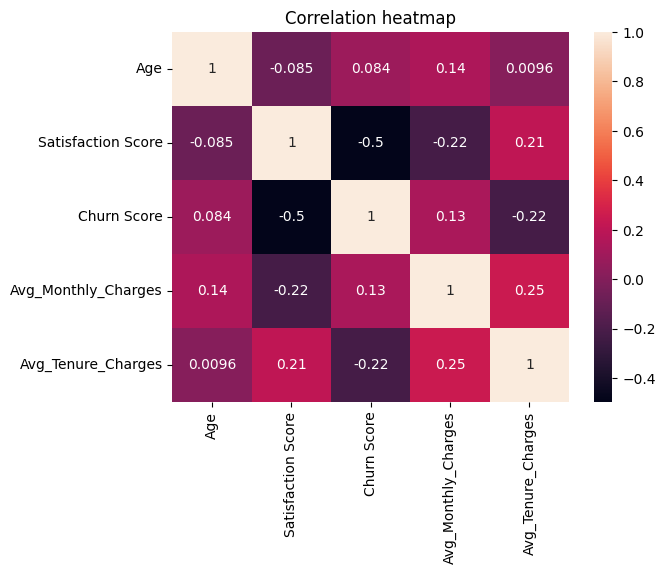

In [42]:
# Updated list of numerical features
num_features_updated = ['Age', 'Satisfaction Score', 'Churn Score', 'Avg_Monthly_Charges', 'Avg_Tenure_Charges']

# Create the heatmap
sns.heatmap(df_encoded[num_features_updated].corr(), annot=True)
plt.title("Correlation heatmap")
plt.show()


Data splitting

In [43]:
df2.columns

Index(['Offer', 'Phone Service', 'Multiple Lines', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Gender', 'Age', 'Married', 'Satisfaction Score',
       'Customer Status', 'Churn Label', 'Churn Score', 'Avg_Monthly_Charges',
       'Avg_Tenure_Charges'],
      dtype='object')

In [44]:
y = df2['Churn Label']
print(y)
X = df2.drop(columns=['Churn Label'])
print(X)


0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Label, Length: 7043, dtype: int64
         Offer Phone Service Multiple Lines        Internet Type  \
0     No Offer            No             No                  DSL   
1      Offer E           Yes            Yes          Fiber Optic   
2      Offer D           Yes            Yes          Fiber Optic   
3      Offer C           Yes             No          Fiber Optic   
4      Offer C           Yes            Yes          Fiber Optic   
...        ...           ...            ...                  ...   
7038  No Offer           Yes             No  No Internet Service   
7039   Offer C           Yes            Yes                Cable   
7040  No Offer           Yes            Yes          Fiber Optic   
7041  No Offer            No             No                  DSL   
7042  No Offer           Yes             No          Fiber Optic   

     Online Security Online

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)#splitting the data in 80 -20 ratio

Preprocessing

In [46]:
num_cols = X_train.select_dtypes(include='number').columns.tolist()
cat_cols = X_train.select_dtypes(include='object').columns.tolist()

print('Numerical columns:', num_cols)
print('Categorical columns:', cat_cols)

Numerical columns: ['Age', 'Satisfaction Score', 'Churn Score', 'Avg_Monthly_Charges', 'Avg_Tenure_Charges']
Categorical columns: ['Offer', 'Phone Service', 'Multiple Lines', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Gender', 'Married', 'Customer Status']


In [47]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

prep_pipe = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_cols),#transforms the categorical column
    ('scaling', StandardScaler(), num_cols)#Transform the numerical column
]).set_output(transform='pandas')

X_train_prep = prep_pipe.fit_transform(X_train)#This fits the preprocessing pipeline to the training data (X_train) and transforms it
X_test_prep = prep_pipe.transform(X_test)#This transforms the test data (X_test) using the already fitted preprocessing pipeline (i.e., using the transformations learned from X_train).

In [48]:
X_train_prep.head()

,ohe__Offer_Offer A,ohe__Offer_Offer B,ohe__Offer_Offer C,ohe__Offer_Offer D,ohe__Offer_Offer E,ohe__Phone Service_Yes,ohe__Multiple Lines_Yes,ohe__Internet Type_DSL,ohe__Internet Type_Fiber Optic,ohe__Internet Type_No Internet Service,...,ohe__Payment Method_Mailed Check,ohe__Gender_Male,ohe__Married_Yes,ohe__Customer Status_Joined,ohe__Customer Status_Stayed,scaling__Age,scaling__Satisfaction Score,scaling__Churn Score,scaling__Avg_Monthly_Charges,scaling__Avg_Tenure_Charges
4626,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,-0.211366,1.454783,-1.589036,-0.337761,-0.676536
4192,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.919362,-0.204880,0.633082,1.368687,-0.827119
5457,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,-0.865998,-0.204880,-0.643454,-0.526593,-1.277665
4717,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,-1.342094,-0.204880,0.160291,0.117923,1.035941
4673,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.145706,-0.204880,0.822198,0.513034,-1.195932


Logistic Regresssion

In [49]:
# One-hot encode categorical variables
from sklearn.linear_model import LogisticRegression
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train logistic regression with class weights
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,roc_curve, ConfusionMatrixDisplay
##create a logistic model
logreg = LogisticRegression()
##train the model
logreg.fit(X_train_prep, y_train)

print('Train score:', logreg.score(X_train_prep, y_train))
print('Test score:', logreg.score(X_test_prep, y_test))

Train score: 0.7392616258430955
Test score: 0.71611071682044


In [51]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.01)
logreg.fit(X_train_prep, y_train)

print('Train score:', logreg.score(X_train_prep, y_train))
print('Test score:', logreg.score(X_test_prep, y_test))

Train score: 0.7392616258430955
Test score: 0.71611071682044


In [52]:
# Probability
y_prob = logreg.predict_proba(X_test_prep)[:, 1]
y_prob

array([0.24885819, 0.2319869 , 0.26307227, ..., 0.24121813, 0.26598423,
       0.24421668])

In [53]:
y_prob>=0.3

array([False, False, False, ..., False, False, False])

In [54]:
(y_prob>=0.5).astype(int)[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [55]:
##Make predictions for training and test sets
y_train_pred = logreg.predict(X_train_prep)  # Predictions on training set
y_test_pred = logreg.predict(X_test_prep)    # Predictions on test set


Accuracy: 0.71611071682044
Confusion Matrix:
 [[1009    0]
 [ 400    0]]


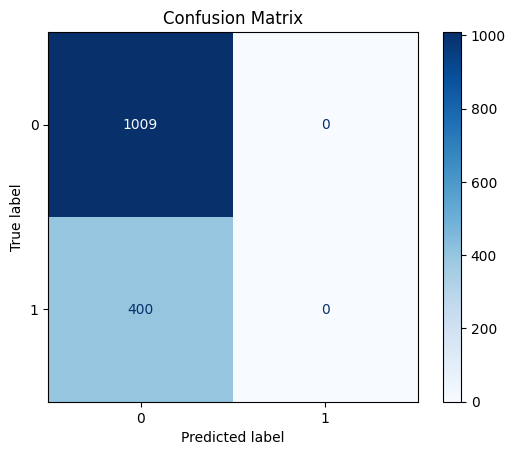

Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.83      1009
           1       0.00      0.00      0.00       400

    accuracy                           0.72      1409
   macro avg       0.36      0.50      0.42      1409
weighted avg       0.51      0.72      0.60      1409



In [56]:
#  Evaluate the model on test set
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)
# Print out the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:\n", class_report)

Accuracy: 0.7392616258430955
Confusion Matrix:
 [[4165    0]
 [1469    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      4165
           1       0.00      0.00      0.00      1469

    accuracy                           0.74      5634
   macro avg       0.37      0.50      0.43      5634
weighted avg       0.55      0.74      0.63      5634



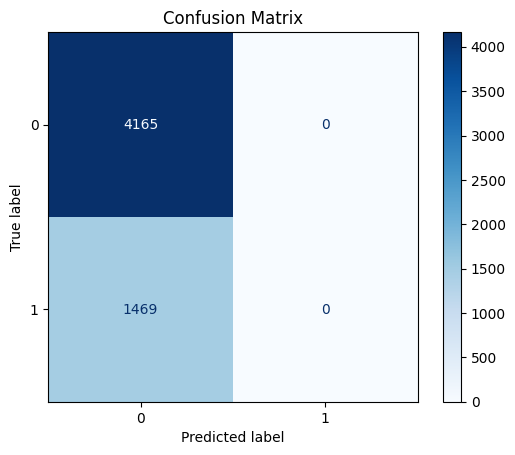

In [57]:
#  Evaluate the model on train set
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)
# Print out the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
print("Classification Report:\n", class_report)

In machine learning, after fitting a Logistic Regression model, it's essential to check for errors, bias, and variance to evaluate its performance and generalization.

In [58]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)

print(f"ROC-AUC: {roc_auc}")

ROC-AUC: 0.5138156590683846


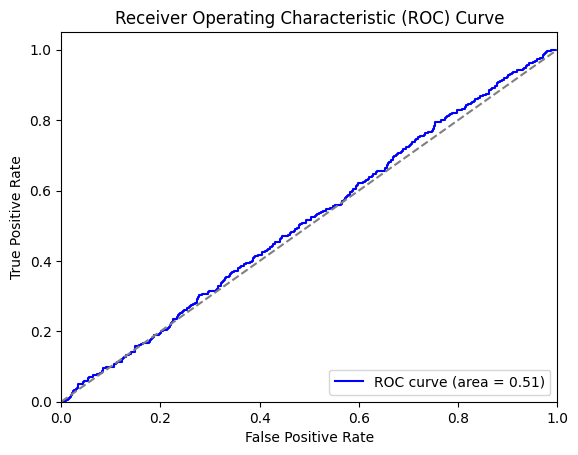

In [59]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Cross Validation

In [60]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd # Import pandas for data manipulation

# Assuming X is a pandas DataFrame, identify columns with 'object' dtype
categorical_features = X.select_dtypes(include=['object']).columns

# Create a ColumnTransformer to handle numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline with the preprocessor and logistic regression model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('logreg', LogisticRegression(C=0.01))])

# Perform 5-fold cross-validation on the pipeline
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Output the results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores)}")

Cross-Validation Scores: [1.         0.99858055 0.99929028 0.99644886 0.99715909]
Mean CV Accuracy: 0.9982957569843217
Standard Deviation of CV Accuracy: 0.0013173949911103426


SVM

In [61]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_prep, y_train)

print('Train score:', svm_linear.score(X_train_prep, y_train))
print('Test score:', svm_linear.score(X_test_prep, y_test))

Train score: 0.7392616258430955
Test score: 0.71611071682044


In [62]:
svm_linear.predict(X_test_prep[:20])#predicting the first 20 samples in the test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [63]:
# Predictions for Train and Test sets
y_train_pred_linear = svm_linear.predict(X_train_prep)
y_test_pred_linear = svm_linear.predict(X_test_prep)

In [64]:
#Evaluate the model on test set
accuracy = accuracy_score(y_test, y_test_pred_linear)
conf_matrix = confusion_matrix(y_test, y_test_pred_linear)
class_report = classification_report(y_test, y_test_pred_linear)
# Print out the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.71611071682044
Confusion Matrix:
 [[1009    0]
 [ 400    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.83      1009
           1       0.00      0.00      0.00       400

    accuracy                           0.72      1409
   macro avg       0.36      0.50      0.42      1409
weighted avg       0.51      0.72      0.60      1409



In [65]:
#  Evaluate the model on train set
accuracy = accuracy_score(y_train, y_train_pred_linear)
conf_matrix = confusion_matrix(y_train, y_train_pred_linear)
class_report = classification_report(y_train, y_train_pred_linear)
# Print out the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7392616258430955
Confusion Matrix:
 [[4165    0]
 [1469    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      4165
           1       0.00      0.00      0.00      1469

    accuracy                           0.74      5634
   macro avg       0.37      0.50      0.43      5634
weighted avg       0.55      0.74      0.63      5634



In [66]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_linear)
# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_test_pred_linear)

print(f"ROC-AUC: {roc_auc}")

ROC-AUC: 0.5


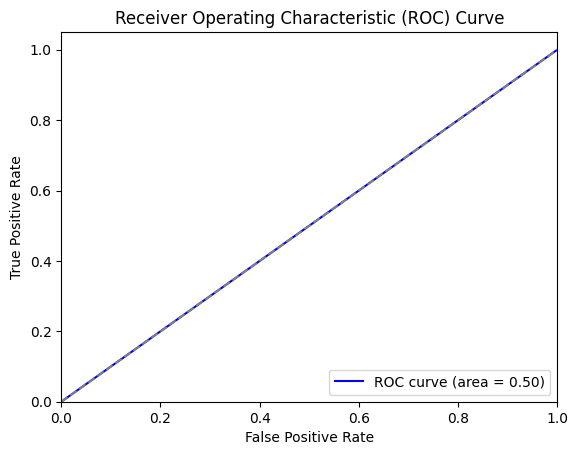

In [67]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Naive Bayes

In [68]:
# Check that cat_cols and num_cols contain correct column names
print(cat_cols)
print(num_cols)

# Check columns of X_train
print(X_train.columns)


['Offer', 'Phone Service', 'Multiple Lines', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Gender', 'Married', 'Customer Status']
['Age', 'Satisfaction Score', 'Churn Score', 'Avg_Monthly_Charges', 'Avg_Tenure_Charges']
Index(['Age', 'Satisfaction Score', 'Churn Score', 'Avg_Monthly_Charges',
       'Avg_Tenure_Charges', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C',
       'Offer_Offer D', 'Offer_Offer E', 'Phone Service_Yes',
       'Multiple Lines_Yes', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_No Internet Service', 'Online Security_Yes',
       'Online Backup_Yes', 'Device Protection Plan_Yes',
       'Premium Tech Support_Yes', 'Streaming TV_Yes', 'Streaming Movies_Yes',
       'Streaming Music_Yes', 'Unlimited Data_Yes', 'Contract_One Year',
       'Contract_Two Year'

In [69]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE


# Split data into features (X) and target (y)
X = df2.drop(columns='Churn Label')
y = df2['Churn Label']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # create the encoder
X_train_encoded = encoder.fit_transform(X_train_prep) # fit and transform the training data
X_test_encoded = encoder.transform(X_test_prep) # transform the test data

# Balance the dataset using SMOTE (Synthetic Minority Over-sampling Technique)
sm = SMOTE( random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train_encoded, y_train)

# Initialize and train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred = nb_model.predict(X_test_encoded)
y_train_pred = nb_model.predict(X_train_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


# Evaluate the model on train set
accuracy = accuracy_score(y_train, y_train_pred)
report = classification_report(y_train, y_train_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Accuracy: 0.3052
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.06      0.10      1009
           1       0.28      0.94      0.43       400

    accuracy                           0.31      1409
   macro avg       0.48      0.50      0.27      1409
weighted avg       0.57      0.31      0.20      1409

Accuracy: 0.9826
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4165
           1       0.94      1.00      0.97      1469

    accuracy                           0.98      5634
   macro avg       0.97      0.99      0.98      5634
weighted avg       0.98      0.98      0.98      5634



In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Create the model
nb_model = GaussianNB()

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # create the encoder
X_encoded = encoder.fit_transform(X) # fit and transform X

# Perform cross-validation
cv_scores = cross_val_score(nb_model, X_encoded, y, cv=5)  # 5-fold cross-validation

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score: 1.0


ROC Curve

ROC-AUC: 0.49525024777006943


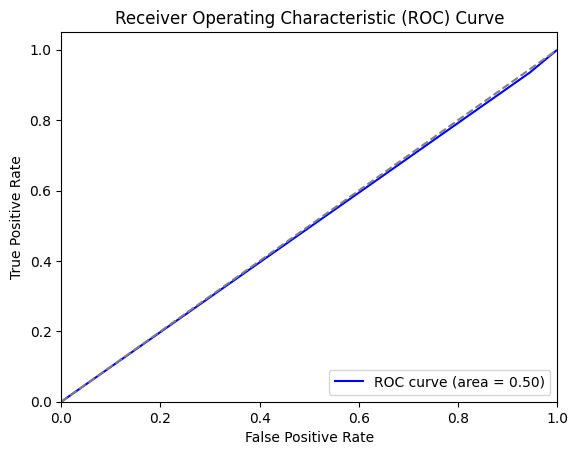

In [71]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)

print(f"ROC-AUC: {roc_auc}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

 Decision Tree Classifier


In [72]:
pip install imbalanced-learn


In [73]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import pandas as pd

In [74]:
# Split data into features (X) and target (y)
X = df2.drop(columns='Churn Label')
y = df2['Churn Label']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # create the encoder
X_train_encoded = encoder.fit_transform(X_train_prep) # fit and transform the training data
X_test_encoded = encoder.transform(X_test_prep) # transform the test data

# Balance the dataset using SMOTE (Synthetic Minority Over-sampling Technique)
sm = SMOTE( random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_encoded, y_train)

# Train a Decision Tree model on the balanced data
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_test_pred = dt_classifier.predict(X_test_encoded)
y_train_pred = dt_classifier.predict(X_train_encoded)


In [75]:
# Evaluate the model on test set
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_test_pred))

# Evaluate the model on train set
accuracy = accuracy_score(y_train, y_train_pred)
report = classification_report(y_train, y_train_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Confusion Matrix:
[[869 140]
 [343  57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.86      0.78      1009
           1       0.29      0.14      0.19       400

    accuracy                           0.66      1409
   macro avg       0.50      0.50      0.49      1409
weighted avg       0.60      0.66      0.61      1409


Accuracy Score: 0.6572036905606813
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4165
           1       1.00      1.00      1.00      1469

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [76]:
from sklearn.tree import DecisionTreeClassifier

# Create the model
dt_classifier = DecisionTreeClassifier(random_state=42)


# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # create the encoder
X_encoded = encoder.fit_transform(X) # fit and transform X

# Perform cross-validation
cv_scores = cross_val_score(dt_classifier, X_encoded, y, cv=5)  # 5-fold cross-validation

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score: 1.0


In [78]:
test_scores=[]
for i in range(1, 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    X_train_prep = prep_pipe.fit_transform(X_train)
    X_test_prep = prep_pipe.transform(X_test)
    tree = DecisionTreeClassifier(max_depth=5)
    tree.fit(X_train_prep, y_train)
    print ('Random state:', i)
    print('Test score:', tree.score(X_test_prep, y_test))
    print('*'*50)
    test_scores.append(tree.score(X_test_prep, y_test))

Random state: 1
Test score: 1.0
**************************************************
Random state: 2
Test score: 1.0
**************************************************
Random state: 3
Test score: 1.0
**************************************************
Random state: 4
Test score: 1.0
**************************************************
Random state: 5
Test score: 1.0
**************************************************
Random state: 6
Test score: 1.0
**************************************************
Random state: 7
Test score: 1.0
**************************************************
Random state: 8
Test score: 1.0
**************************************************
Random state: 9
Test score: 1.0
**************************************************


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

accuracies = []  # Store accuracy scores for each iteration

for i in range (1,10):

    # Calculate and print accuracy
    y_pred = tree.predict(X_test_prep)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test accuracy:', accuracy)
    accuracies.append(accuracy)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

    print('*' * 50)  # Separato
print('Average Accuracy:', sum(accuracies) / len(accuracies))

Test accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1056
           1       1.00      1.00      1.00       353

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

Confusion Matrix:
[[1056    0]
 [   0  353]]
**************************************************
Test accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1056
           1       1.00      1.00      1.00       353

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

Confusion Matrix:
[[1056    0]
 [   0  353]]
**************************************************
Test accuracy: 1.0
Classification Report:
              precision    r

In [81]:
# Predict probabilities for the positive class (1) for ROC-AUC
y_test_pred_dc = tree.predict_proba(X_test_prep)[:, 1]  # Probabilities for the positive class

ROC-AUC: 1.0


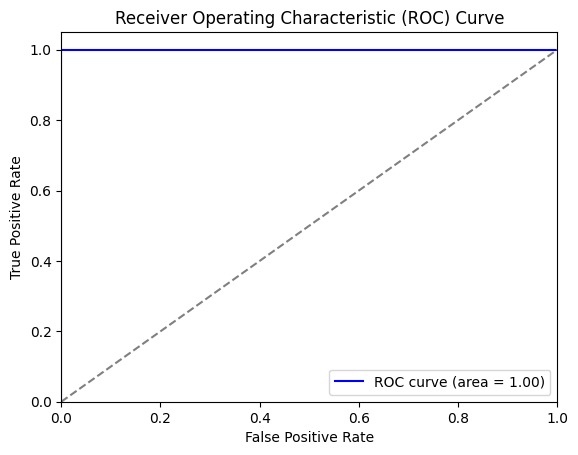

In [82]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_dc)
# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_test_pred_dc)

print(f"ROC-AUC: {roc_auc}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [85]:
print('Min test score:', min(test_scores))
print('Max test score:', max(test_scores))
print('Mean test score:', np.mean(test_scores))

Min test score: 1.0
Max test score: 1.0
Mean test score: 1.0


In [86]:
test_scores=[]
for i in range(3, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_prep = prep_pipe.fit_transform(X_train)
    X_test_prep = prep_pipe.transform(X_test)
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train_prep, y_train)
    print ('Max depth:', i)
    print('Test score:', tree.score(X_test_prep, y_test))
    print('*'*50)
    test_scores.append(tree.score(X_test_prep, y_test))

Max depth: 3
Test score: 1.0
**************************************************
Max depth: 4
Test score: 1.0
**************************************************
Max depth: 5
Test score: 1.0
**************************************************
Max depth: 6
Test score: 1.0
**************************************************
Max depth: 7
Test score: 1.0
**************************************************
Max depth: 8
Test score: 1.0
**************************************************
Max depth: 9
Test score: 1.0
**************************************************
Max depth: 10
Test score: 1.0
**************************************************


Cross Validation


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train_prep = prep_pipe.fit_transform(X_train)
X_val_prep = prep_pipe.transform(X_val)
X_test_prep = prep_pipe.transform(X_test)

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train_prep, y_train)

print('Train score:', tree.score(X_train_prep, y_train))
print('Validation score:', tree.score(X_val_prep, y_val))

Train score: 1.0
Validation score: 1.0


In [101]:
m1 = LogisticRegression()
m2 = GaussianNB()
m3 =  SVC()
m4 = DecisionTreeClassifier(max_depth=5)

val_scores = {}
for model in [m1,m2,m3,m4]:
    model.fit(X_train_prep, y_train)
    val_scores[model] = model.score(X_val_prep, y_val)

val_scores

{LogisticRegression(): 1.0,
 GaussianNB(): 0.9985805535841022,
 SVC(): 1.0,
 DecisionTreeClassifier(max_depth=5): 1.0}

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_prep = prep_pipe.fit_transform(X_train)
X_test_prep = prep_pipe.transform(X_test)

In [90]:
from sklearn.model_selection import cross_val_score

tree = DecisionTreeClassifier(max_depth=5)
scores = cross_val_score(tree, X_train_prep, y_train, cv=5, scoring='accuracy')

print('Cross validation scores:', scores)
print('Cross validation score:', np.mean(scores), '+/-', np.std(scores))

Cross validation scores: [1. 1. 1. 1. 1.]
Cross validation score: 1.0 +/- 0.0


In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

logreg = LogisticRegression(C=0.01)
tree = DecisionTreeClassifier(max_depth=5)
svm = SVC()

scores_lst = []
for model in [logreg, GaussianNB(), svm, tree]:
    scores = cross_val_score(model, X_train_prep, y_train, cv=5)
    scores_lst.append(np.mean(scores))

# Reshape scores_lst to a single column (4 rows) to match the DataFrame structure
scores_lst = np.array(scores_lst).T  # Transpose to have 4 rows (one for each model)

df = pd.DataFrame(scores_lst, index=['logreg', 'Naive Bayes', 'SVM', 'tree'], columns=['cross_val_score'])
print(df)

             cross_val_score
logreg              0.990060
Naive Bayes         0.996805
SVM                 1.000000
tree                1.000000


best model:decision tree

In [104]:
logreg.fit(X_train_prep, y_train)

LogisticRegression(C=0.01)

In [105]:
logreg.score(X_test_prep, y_test)

0.9914833215046132

since our each model is having very high accuracy so we will now follow the  process of splitting data into train, validation, and test sets  to ensure that the machine learning model we develop is not only good at predicting outcomes on the data it was trained on but also generalizes well to new, unseen data(validation set). This is a crucial part of model evaluation in machine learning.

Sentimental Analysis

In [99]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import string
def clean_text(text):
    text = str(text).lower()
    text = text.replace('\n', ' ').replace('\r', '')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

churn['Cleaned_Text'] = churn['Churn Reason'].apply(clean_text)


In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
churn['Sentiment_Score'] = churn['Cleaned_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])


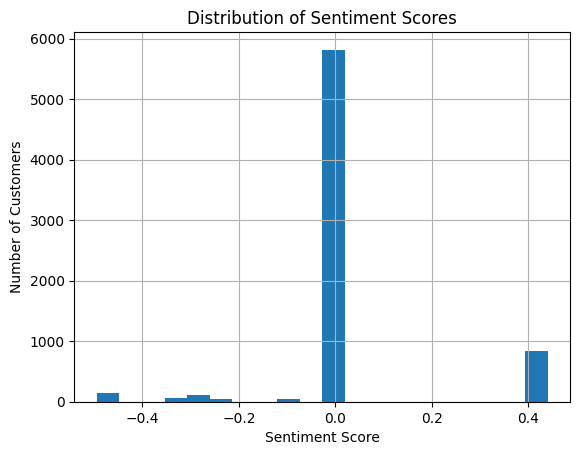

In [ ]:
import matplotlib.pyplot as plt
churn['Sentiment_Score'].hist(bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Customers')
plt.title('Distribution of Sentiment Scores')
plt.show()

In [ ]:
print(churn[['Cleaned_Text', 'Sentiment_Score']].head())


                   Cleaned_Text  Sentiment_Score
0  competitor offered more data           0.0000
1  competitor made better offer           0.4404
2  competitor made better offer           0.4404
3     limited range of services          -0.2263
4            extra data charges          -0.2732


Interpretation of Sample Data:

**"competitor offered more data" has a Sentiment_Score of 0.0000:**
This indicates neutral sentiment. The phrase does not express a clear positive or negative emotion.

**"competitor made better offer" has a Sentiment_Score of 0.4404:**
This is moderately positive, suggesting the customer viewed the competitor's offer in a favorable light.

**"limited range of services" has a Sentiment_Score of -0.2263:**
This is somewhat negative, implying the customer was dissatisfied with the range of services offered.

**"extra data charges" has a Sentiment_Score of -0.2732:**
This shows a more negative sentiment, indicating frustration or dissatisfaction with additional charges.

# Overall Analysis:
**Positive Feedback:** Feedback related to competitors' better offers is rated positively, which might suggest that customers left because they found more attractive deals elsewhere.

Negative Feedback: Feedback about limited services and extra charges is rated negatively, suggesting that these are pain points for customers and may have contributed to their decision to churn.

This analysis can help identify areas for improvement, such as addressing complaints about service range or extra charges.




In [ ]:
churned = churn[churn['Customer Status'] == 'Churned']
stayed = churn[churn['Customer Status'] == 'Stayed']

print('Average Sentiment Score for Churned Customers:', churned['Sentiment_Score'].mean())
print('Average Sentiment Score for Stayed Customers:', stayed['Sentiment_Score'].mean())


Average Sentiment Score for Churned Customers: 0.12540342429106474
Average Sentiment Score for Stayed Customers: 0.0


**Average Sentiment Score for Churned Customers: 0.1254**
This score is slightly positive (closer to neutral but above 0), which suggests that while some churned customers may have had a negative experience (leading them to leave), the feedback collected from them wasn't overwhelmingly negative.
It could indicate that customers churned not just because of dissatisfaction but potentially for other reasons (e.g., better competitor offers or other neutral factors).

**Average Sentiment Score for Stayed Customers: 0.0**
This score is exactly neutral (0.0), suggesting that the text data associated with customers who stayed reflects neither strong positive nor negative sentiment.
It may imply that the customers who stayed either did not express any emotional feedback, or the feedback provided was factual and non-opinionated, leading to neutral sentiment.
Key Insights:

**Churned Customers:** Although the average sentiment is slightly positive, there could be a mix of reasons for churn, including both neutral and positive experiences. This may indicate opportunities for customer retention if certain pain points (like pricing or service range) are addressed.


**Stayed Customers:** A neutral sentiment for customers who stayed suggests that those who remained did not express strong emotional reactions, which could be a sign of contentment but also complacency. Understanding the motivations behind their decision to stay might provide additional insights